# PRJNA796340 - Sapoval et al.

Article link: https://www.nature.com/articles/s41467-023-38184-3.

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJNA796340_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,10025,+10026.A,ins:10026:1,0,52,0,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
2,10046,+10047.T,ins:10047:1,0,46,0,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
3,10160,+10161.T,ins:10161:1,0,1412,0,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
4,10210,+10211.A,ins:10211:1,0,1822,0,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
5,1026,+1027.T,ins:1027:1,0,745,0,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
6,10301,+10302.A,ins:10302:1,0,1853,0,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918


In [3]:
lineages_in_paper <- c("B.1.1.7", "B.1.617.2", "B.1.1.529")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  3 68

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
 13.146   0.299  13.586 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,0.0005977563,NA,NA,B.1.1.529,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
2,0.8754270820,NA,NA,B.1.1.7,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
3,0.0568862198,NA,NA,B.1.617.2,SRR17568720,2021-03-15T00:00:00Z,20210315_UB,302,33966665,PRJNA796340,"USA: Texas\, Houston",97918
4,0.0072970805,NA,NA,B.1.1.529,SRR17568721,2021-03-15T00:00:00Z,20210315_TC,306,41109312,PRJNA796340,"USA: Texas\, Houston",59188
5,0.9067763370,NA,NA,B.1.1.7,SRR17568721,2021-03-15T00:00:00Z,20210315_TC,306,41109312,PRJNA796340,"USA: Texas\, Houston",59188
6,0.0366732716,NA,NA,B.1.617.2,SRR17568721,2021-03-15T00:00:00Z,20210315_TC,306,41109312,PRJNA796340,"USA: Texas\, Houston",59188


`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?


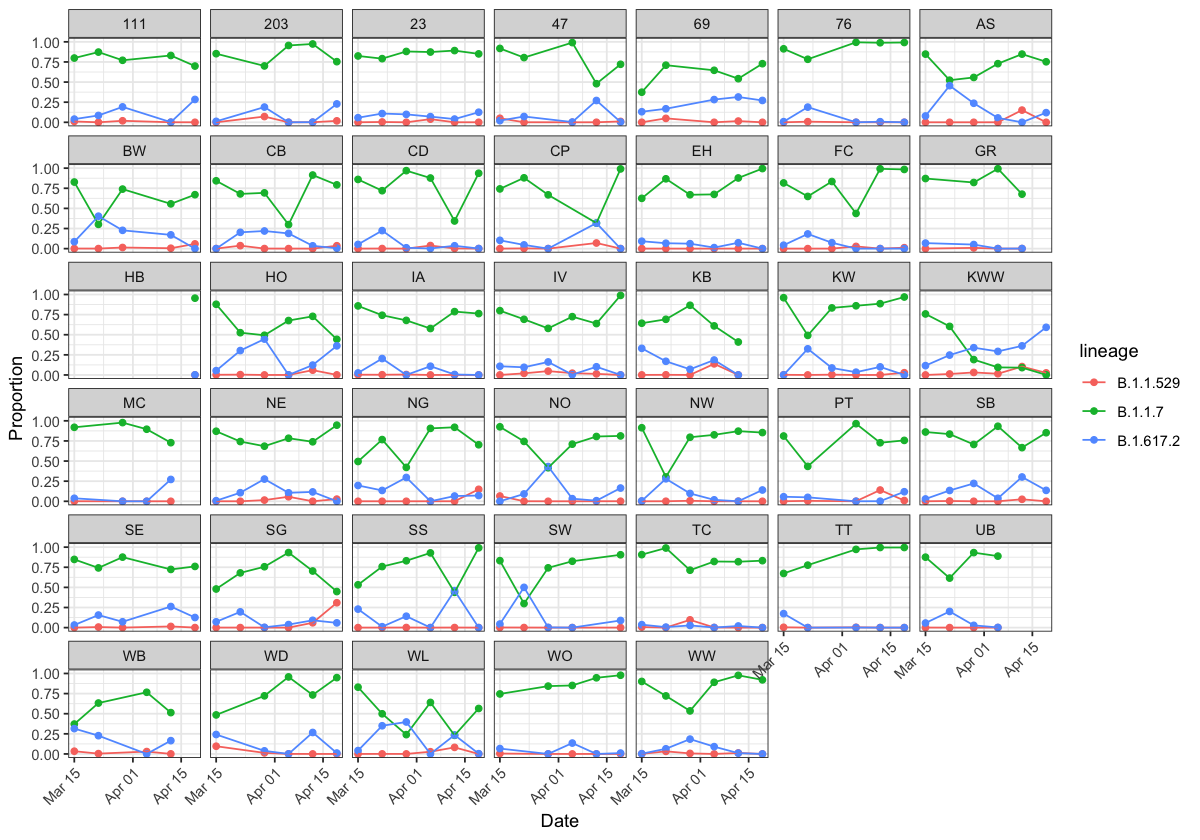

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)
res$date <- lubridate::date(res$date)

# One sample taken long after the others - doesn't show trend and makes plot difficult to read.
res <- res[res$date < ymd("2021-11-01"), ]

# The WWTP names require regexing.
res$wwtp <- lapply(res$sample, function(x) {
    splt <- strsplit(x, split = "(_|\\-)")[[1]]
    splt[length(splt)]
}) |> unlist()

gg <- autoplot(res, date_col = "date") + facet_wrap(~ wwtp) +
    geom_line() +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
suppressWarnings({
    print(gg)
})
